In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (14, 5)
mpl.rcParams['axes.grid'] = False

In [20]:
###data_preprocessing###

def reading_data(typ,url):
    df = pd.read_csv(url)
    res_df = df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
    res_df = res_df.rename({'variable':'Date','value':typ}, axis='columns')
    return res_df

In [21]:
corona_confirmed_df = reading_data('Confirmed',
                                   'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [22]:
corona_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [23]:
corona_recovered_df = reading_data('Recovered',
                                   'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [24]:
corona_recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Japan,36.0000,138.0000,1/22/20,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [25]:
corona_death_df = reading_data('Death',
                               'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [26]:
corona_death_df.head()

,Province/State,Country/Region,Lat,Long,Date,Death
0,NaN,Thailand,15.0000,101.0000,1/22/20,0
1,NaN,Japan,36.0000,138.0000,1/22/20,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0


In [42]:
####data preprocessing###
combined_df = [corona_confirmed_df, corona_death_df, corona_recovered_df]
combined_df = [df.set_index(['Province/State','Country/Region','Lat','Long','Date']) for df in combined_df]
combined_df=combined_df[0].join(combined_df[1:])
combined_df=combined_df.reset_index()
combined_df[['Lat', 'Long','Confirmed','Death','Recovered']] = combined_df[['Lat', 'Long','Confirmed','Death','Recovered']].apply(pd.to_numeric)
combined_df[['Date']] = combined_df[['Date']].apply(pd.to_datetime)
combined_df=combined_df.rename({'Province/State':'State','Country/Region': 'Country'}, axis='columns')

In [40]:
combined_df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Death                      int64
Recovered                  int64
dtype: object

In [43]:
combined_df.head()

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [44]:
combined_df.query("Country=='US' & State=='Washington'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
98,Washington,US,47.4009,-121.4905,2020-01-22,0,0,0
585,Washington,US,47.4009,-121.4905,2020-01-23,0,0,0
1072,Washington,US,47.4009,-121.4905,2020-01-24,0,0,0
1559,Washington,US,47.4009,-121.4905,2020-01-25,0,0,0
2046,Washington,US,47.4009,-121.4905,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
27370,Washington,US,47.4009,-121.4905,2020-03-18,1014,55,0
27857,Washington,US,47.4009,-121.4905,2020-03-19,1376,74,0
28344,Washington,US,47.4009,-121.4905,2020-03-20,1524,83,0
28831,Washington,US,47.4009,-121.4905,2020-03-21,1793,94,0


In [45]:
combined_df.query("Country=='China' & State=='Hubei'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered
154,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28
641,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28
1128,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31
1615,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32
2102,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42
...,...,...,...,...,...,...,...,...
27426,Hubei,China,30.9756,112.2707,2020-03-18,67800,3122,56927
27913,Hubei,China,30.9756,112.2707,2020-03-19,67800,3130,57682
28400,Hubei,China,30.9756,112.2707,2020-03-20,67800,3133,58382
28887,Hubei,China,30.9756,112.2707,2020-03-21,67800,3139,58946


In [46]:
combined_df['Active']=combined_df['Confirmed'] - combined_df['Death'] - combined_df['Recovered']

In [47]:
combined_df.query("Country=='China' & State=='Hubei'")

,State,Country,Lat,Long,Date,Confirmed,Death,Recovered,Active
154,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,399
641,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,399
1128,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,494
1615,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,689
2102,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,964
...,...,...,...,...,...,...,...,...,...
27426,Hubei,China,30.9756,112.2707,2020-03-18,67800,3122,56927,7751
27913,Hubei,China,30.9756,112.2707,2020-03-19,67800,3130,57682,6988
28400,Hubei,China,30.9756,112.2707,2020-03-20,67800,3133,58382,6285
28887,Hubei,China,30.9756,112.2707,2020-03-21,67800,3139,58946,5715


In [48]:
max_df=combined_df[combined_df.Date==combined_df['Date'].max()]

In [58]:
max_df['Country'].value_counts()


US                     247
China                   33
Canada                  12
Australia                9
France                   9
                      ... 
Poland                   1
Brunei                   1
Malta                    1
Mexico                   1
Congo (Brazzaville)      1
Name: Country, Length: 171, dtype: int64

In [56]:
max_df[['Country','Active']].sort_values('Active',ascending=False).head(10)

,Country,Active
29236,Italy,46638
29231,Germany,24513
29238,Spain,24421
29319,US,15676
29377,France,13144
29375,Iran,12022
29251,Switzerland,7016
29376,"Korea, South",5884
29623,United Kingdom,5337
29374,China,5223


In [55]:
max_df[['Country','Confirmed']].groupby(['Country']).sum().sort_values('Confirmed',ascending=False).head(10)

,Confirmed
Country,
China,81397
Italy,59138
US,33272
Spain,28768
Germany,24873
Iran,21638
France,16176
"Korea, South",8897
Switzerland,7245


## Lets compare 2 nations which performed well

## China

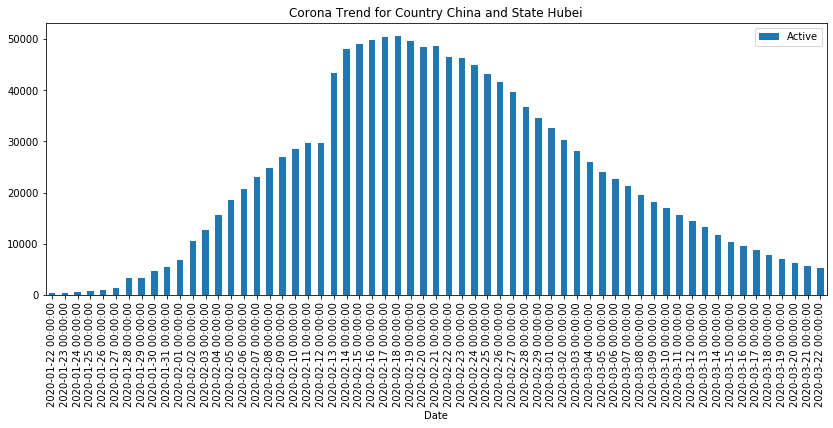

In [61]:
combined_df[['Date','Country','State','Active']].query("Country=='China' & State=='Hubei'").\
plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country China and State Hubei")

On 23 January 2020, the central government of China imposed a lockdown in Wuhan and other cities in Hubei province

On 2 February 2020, China implemented a seven-day lockdown in which only one person per household was allowed to exit once each two days, and most of the highway exits were closed

On 13 March 2020, Huangshi and Qianjiang became the first Hubei cities to remove strict travel restrictions within part or all of their administrative confines

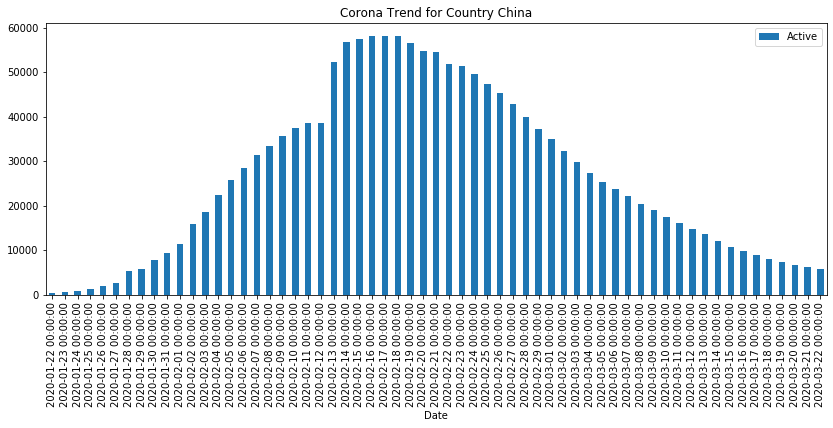

In [63]:
combined_df[['Date','Country','State','Active']].groupby(['Date','Country']).sum().query("Country=='China'")\
.reset_index().plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country China")

## South Korea


South Korea did not lockdown

South Korea tests anyone who had been in contact with a confirmed case, and tracks down by credit card activity, surveillance camera footage and mobile phone tracking those who are potentially exposed, a measure that has proved effective but has raised questions about privacy

South Korea had conducted almost 250,000 tests

Source - Forbes

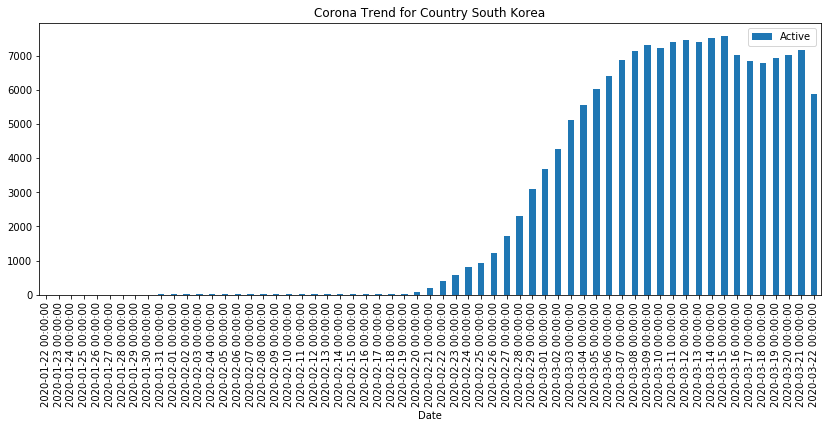

In [64]:
combined_df[['Date','Country','State','Active']].query("Country=='Korea, South'").plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country South Korea")

## Now worst performing nation

## Italy

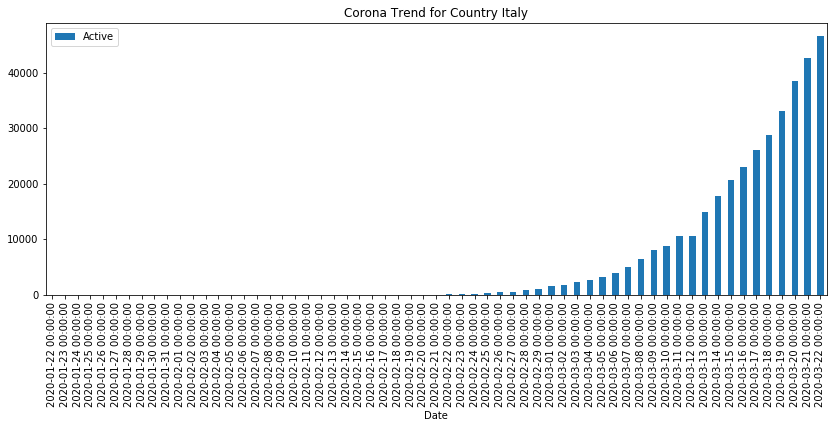

In [65]:
combined_df[['Date','Country','State','Active']].query("Country=='Italy'").plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country Italy")

## Iran

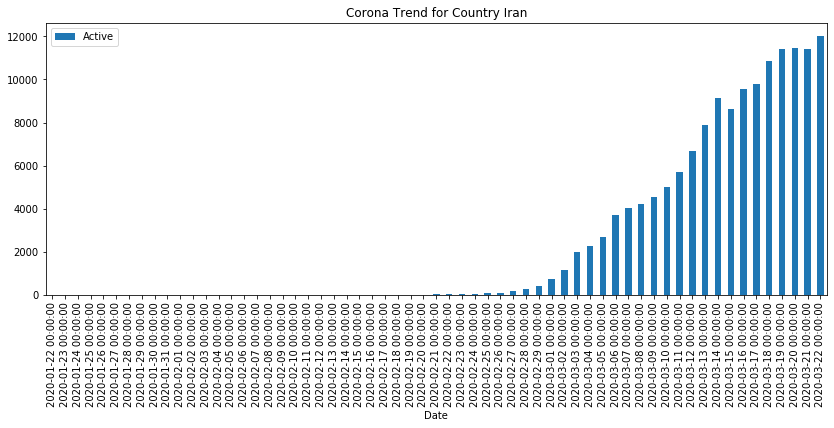

In [66]:
combined_df[['Date','Country','State','Active']].query("Country=='Iran'").plot(x='Date',y='Active',kind='bar', title="Corona Trend for Country Iran")

# INDIA

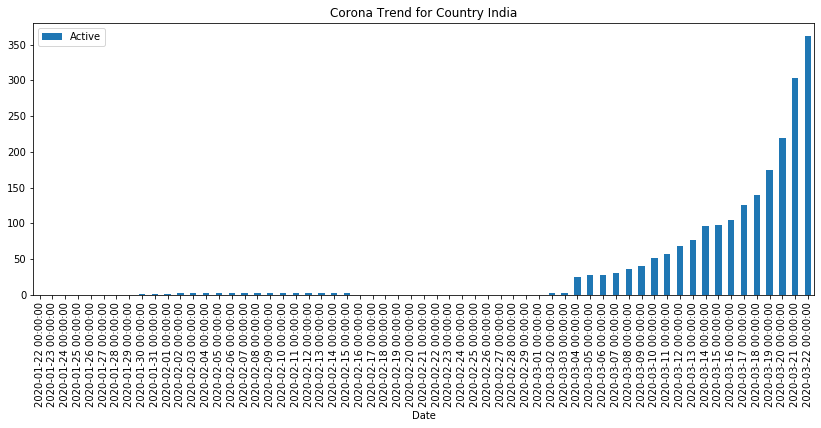

In [68]:
combined_df[['Date','Country','State','Active']].groupby(['Date','Country']).sum().query("Country=='India'")\
.reset_index().plot(x='Date',y='Active',kind='bar',title="Corona Trend for Country India")

India's first death on 12th March


Second Death on March 13 night.